### INTRODUCTION TO CLASSIFICATION

In Classification, we predict the category a data belongs to ie. Classification algorithms are used to predict labels
* Spam Detection
* Churn Prediction
* Sentiment Analysis
* Dog Breed Detection

### TYPES OF CLASSIFICATION TASK

* Binary classification eg. e-mail spam detection (1 ->spam; or 0→not spam), biometric identification, whether a customer will default or Not
* Multi-class classification eg. digit recognition (where classes go from 0 to 9), predicting a party that wins the election,  

![class](class.png "Classification Task" )


Classification Algorithms
1.	Logistic Regression         
2.  Naive Bayes Classifier
3.	Nearest Neighbor			
4. 	Support Vector Machines
5.	Decision Trees				
6. 	Boosted Trees
7.  Random Forest	     

Overview

    -- Binary/ Multi-class classification 

    -- Classification Algorithms 

    -- Evaluation of Classification Models Performance 

    -- Error/ Cost function 

    -- Confusion matrix 

    -- Precision  

    -- AUC 



#### Applications of Classification

In this example we will perform two-class classification using logistic regression. A classifier is a machine learning model that separates the label into categories or classes. In other words, classification models are supervised machine learning models which predict a categorical label.

The social network data is used to determine if a particular person purcahsed an ad or not. Thus, purchased column is the classes that is to be predicted.

Logistic regression is a linear model but with a nonlinear response. The response is binary, $\{ 0,1 \}$, or positive and negative. The response is the prediction of the category. 

In this example you will learn the following: 
-  How to prepare data for classification models using scikit-learn. 
-  Constructing a classification model using scikit-learn.
-  Evaluating the performance of the classification model. 


## Import Modules 

In [4]:
#import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

Logistic regression is widely used as a classification model. Logistic regression is linear model, with a binary response, `{False, True}` or `{0, 1}`. You can think of this response as having a Binomial distribution. For linear regression the response is just, well, linear. Logistic regression is a linear regression model with a nonlinear output. The response of the linear model is transformed or 'squashed' to values close to 0 and 1 using a **sigmoidal function**, also known as the **logistic function**. The result of this transformation is a response which is the log likelihood for each of the two classes. 

The sigmoidal or logistic function can be expressed as follows:

$$f(x) = \frac{1}{1 + e^{-\kappa(x - x_0)}} \\
\kappa = steepness$$

Execute the code in the cell below to compute and plot an example of the logistic function.

Text(0.5, 0, 'Value of output from linear regression')

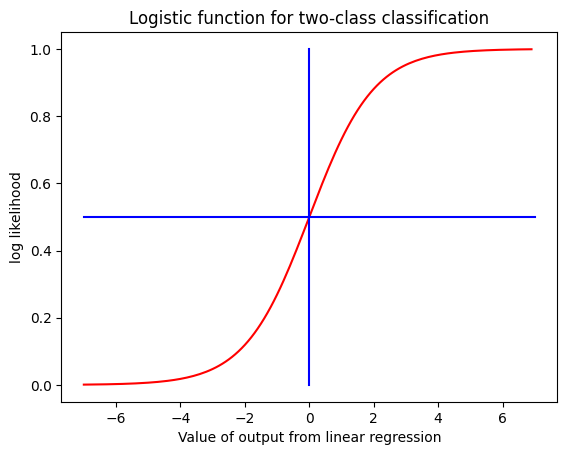

In [5]:
xseq = np.arange(-7, 7, 0.1)

logistic = [math.exp(v)/(1 + math.exp(v)) for v in xseq]

plt.plot(xseq, logistic, color = 'red')
plt.plot([-7,7], [0.5,0.5], color = 'blue')
plt.plot([0,0], [0,1], color = 'blue')
plt.title('Logistic function for two-class classification')
plt.ylabel('log likelihood')
plt.xlabel('Value of output from linear regression')

## Load and prepare the data set

As a first step, load the dataset. 

In [201]:
data= pd.read_csv("Social_Network_Ads.csv", delimiter= ",")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Pre-processing Data


In [179]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [15]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


## Exploratory analysis

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null int32
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int32(1), int64(4)
memory usage: 14.1 KB


In [16]:
# check duplicates
data.duplicated().sum()

0

In [17]:
#check null values
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
#check the spread of the target
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [19]:
data['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [183]:
data[['Age','Purchased']].value_counts().tail(10)

Age  Purchased
44   1            1
48   0            1
34   1            1
52   0            1
38   1            1
51   0            1
50   0            1
31   1            1
41   1            1
29   1            1
dtype: int64

In [24]:
# employees that did not buy and those that bought

grp_data= data.groupby('Purchased')
grp_data.mean()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,1.569116e+07,0.505837,32.793774,60544.747082
1,1.569222e+07,0.461538,46.391608,86272.727273


In [25]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


## Data Visualization

Users that purchased these Ads

In [26]:
left_count = grp_data.count()

In [27]:
left_count

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,257,257,257,257
1,143,143,143,143


In [35]:
purchases = pd.DataFrame(data.Purchased.value_counts())
purchases

,Purchased
0,257
1,143


In [39]:
purchases.index.values

array([0, 1], dtype=int64)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


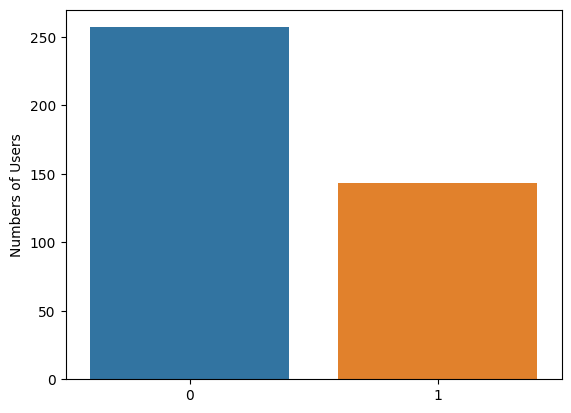

In [43]:
#how many users were in each category ?

sns.barplot(purchases.index.values, purchases.Purchased)
plt.ylabel("Numbers of Users")
plt.show()

In [44]:
#how many users were in each category ?

# plt.bar(left_count.index.values, left_count['User ID'])
# plt.ylabel("Numbers of Users")
# plt.show()

In [29]:
# ratio of users that did bought the Ads were only 36%

data.Purchased.value_counts()
float(data.Purchased.value_counts()[1])/len(data) * 100

35.75

### A little bit of feature engineering !

1) Using an Age category

    - IGen[1-24],
    - Millenials[25-39], 
    - GenX[40-54], 
    - BabyBoomers[55-73] 

In [186]:
data2 = data.copy()
data2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [189]:
data['Age'].values

array([19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32, 18, 29, 47,
       45, 46, 48, 45, 47, 48, 45, 46, 47, 49, 47, 29, 31, 31, 27, 21, 28,
       27, 35, 33, 30, 26, 27, 27, 33, 35, 30, 28, 23, 25, 27, 30, 31, 24,
       18, 29, 35, 27, 24, 23, 28, 22, 32, 27, 25, 23, 32, 59, 24, 24, 23,
       22, 31, 25, 24, 20, 33, 32, 34, 18, 22, 28, 26, 30, 39, 20, 35, 30,
       31, 24, 28, 26, 35, 22, 30, 26, 29, 29, 35, 35, 28, 35, 28, 27, 28,
       32, 33, 19, 21, 26, 27, 26, 38, 39, 37, 38, 37, 42, 40, 35, 36, 40,
       41, 36, 37, 40, 35, 41, 39, 42, 26, 30, 26, 31, 33, 30, 21, 28, 23,
       20, 30, 28, 19, 19, 18, 35, 30, 34, 24, 27, 41, 29, 20, 26, 41, 31,
       36, 40, 31, 46, 29, 26, 32, 32, 25, 37, 35, 33, 18, 22, 35, 29, 29,
       21, 34, 26, 34, 34, 23, 35, 25, 24, 31, 26, 31, 32, 33, 33, 31, 20,
       33, 35, 28, 24, 19, 29, 19, 28, 34, 30, 20, 26, 35, 35, 49, 39, 41,
       58, 47, 55, 52, 40, 46, 48, 52, 59, 35, 47, 60, 49, 40, 46, 59, 41,
       35, 37, 60, 35, 37

In [190]:
data2 = data.copy()
data2['Age Category'] = ['iGen' if 0<age<25 else 'Millenials' if 24<age<40 else 'GenX' if 39<age<55 
                        else 'BabyBoomers' if 54<age<74 else None \
                         for age in list(data['Age'].values)]

In [191]:
data2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,Male,19,19000,0,iGen
1,15810944,Male,35,20000,0,Millenials
2,15668575,Female,26,43000,0,Millenials
3,15603246,Female,27,57000,0,Millenials
4,15804002,Male,19,76000,0,iGen


In [195]:
cat_data = pd.DataFrame({'Age':[0,24,25,40,55,73, 89]})
# cat_data

bins= [-1,24,39,54,73,110]
labels = ['iGen','Millenials','GenX','BabyBoomers','Adult']
cat_data['AgeGroup'] = pd.cut(cat_data['Age'], bins=bins, labels=labels, right=True)
print (cat_data)

   Age     AgeGroup
0    0         iGen
1   24         iGen
2   25   Millenials
3   40         GenX
4   55  BabyBoomers
5   73  BabyBoomers
6   89        Adult


In [134]:
# x = [1,2,3,4]
# for (i, item) in enumerate(x, start=0):
#     print(i, item)

In [135]:
data['Age Category'] = 0
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,0


In [136]:
# data2['Age Category'].loc[2] = 3

In [137]:
for (index, age) in enumerate(data['Age']):
    if 55<age<74:
        data['Age Category'].loc[index] = 'BabyBoomers'
    elif 39<age<56:
        data['Age Category'].loc[index] =  'GenX'
    elif 24<age<40:
         data['Age Category'].loc[index] = 'Millenials'
    elif 0<age<25:
        data['Age Category'].loc[index] = 'iGen'
    else:
        None  

C:\Users\User\AppData\Local\Temp\ipykernel_22984\2621825132.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age Category'].loc[index] = 'iGen'


In [138]:
# df.at[0, 'Age'] = '35'

In [139]:
data2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,Male,19,19000,0,iGen
1,15810944,Male,35,20000,0,Millenials
2,15668575,Female,26,43000,0,Millenials
3,15603246,Female,27,57000,0,Millenials
4,15804002,Male,19,76000,0,iGen


In [140]:
data['Age Category'].value_counts()

Millenials     195
GenX           134
iGen            43
BabyBoomers     28
Name: Age Category, dtype: int64

2) Using an Income category [Inter-quartile Ranges]

In [196]:
data['Income Category'] = pd.qcut(data['EstimatedSalary'],3,labels=['Low','Medium','High'])

In [198]:
data.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased,Income Category
239,15772073,Female,53,143000,1,High
126,15610801,Male,42,65000,0,Medium
145,15746422,Female,24,89000,0,High
18,15704583,Male,46,28000,1,Low
43,15792008,Male,30,15000,0,Low
134,15800061,Female,28,55000,0,Medium
45,15639277,Male,23,20000,0,Low
255,15750056,Female,52,90000,1,High
38,15671766,Female,26,72000,0,Medium
352,15587419,Female,42,90000,1,High


Lets see the Visuals

In [143]:
age_cat = data.groupby('Age Category').count()
inc_cat = data.groupby('Income Category').count()

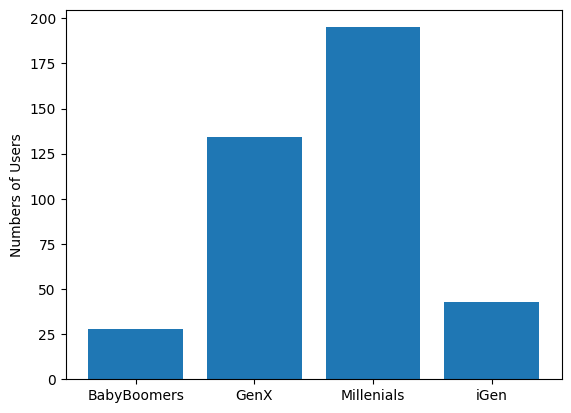

In [144]:
plt.bar(age_cat.index.values, age_cat['Age'])
plt.ylabel("Numbers of Users")
plt.show()

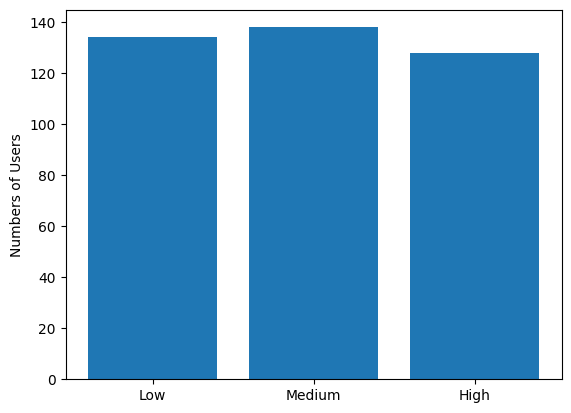

In [145]:
plt.bar(inc_cat.index.values, inc_cat['Age'])
plt.ylabel("Numbers of Users")
plt.show()

In [146]:
# data[data['Income Category'] == 'High'].max()

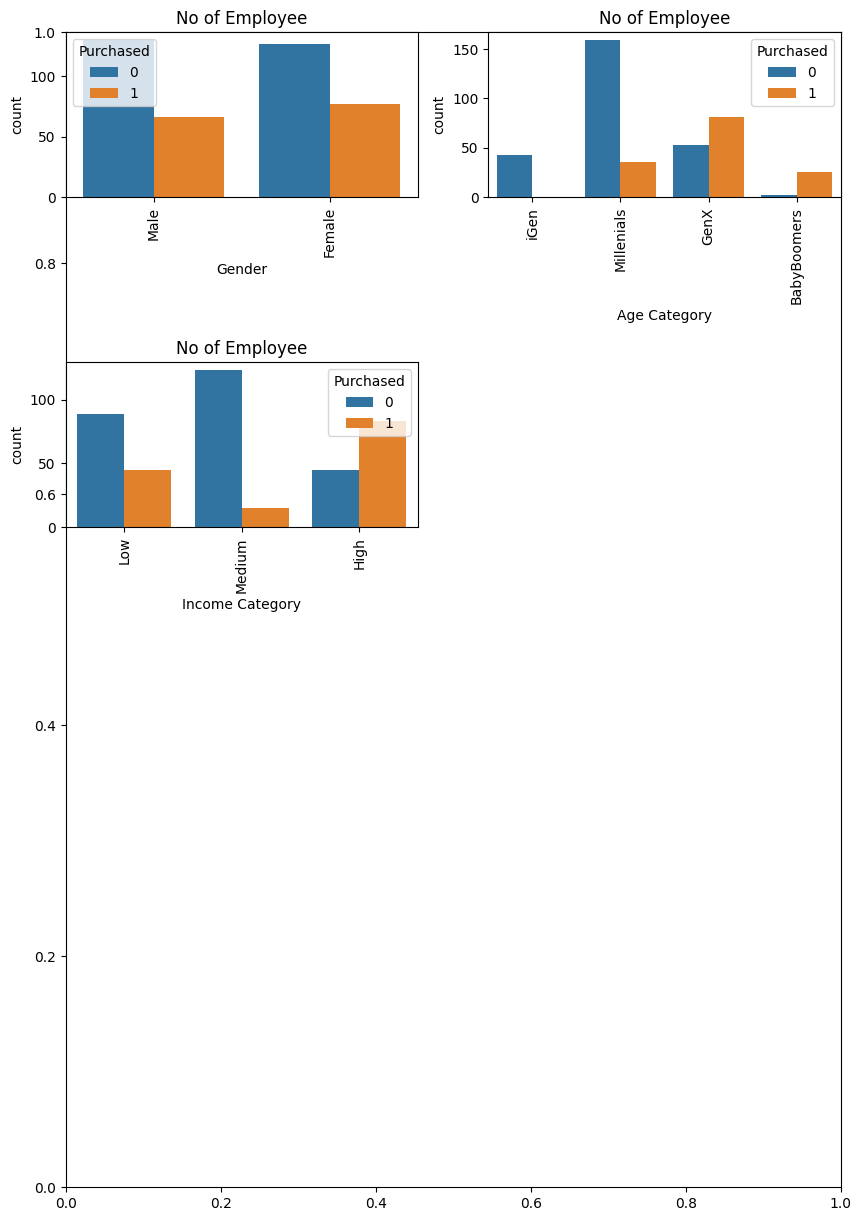

In [148]:
#whats the statistics based on those who did not make purchase

features= ['Gender', 'Age Category', 'Income Category']
fig= plt.subplots(figsize= (10,15))

for i,j in enumerate(features):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=data , hue= "Purchased")
    plt.xticks(rotation= 90)
    plt.title("No of Employee")

## Data Preprocessing

In [199]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Income Category'],
      dtype='object')

In [202]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Encoding Column String values
Label Encoding and One-Hot Encoding are two powerful tools to convert categorical data into a format that computers can work with. Label Encoding is suitable when there is an intrinsic order in the categories, whereas One-Hot Encoding is better for nominal categories.

There are two common ways to convert categorical variables into numeric variables:

1. Label Encoding: Assign each categorical value an integer value based on alphabetical order.

2. One Hot Encoding: Create new variables that take on values 0 and 1 to represent the original categorical values.

**When to Use Label Encoding vs. One Hot Encoding**

In most scenarios, one hot encoding is the preferred way to convert a categorical variable into a numeric variable because label encoding makes it seem that there is a ranking between values. However, one hot encoding requires you to make as many new variables as there are unique values in the original categorical variable.

In [203]:
df = pd.DataFrame({'Grade': ['A', 'A', 'B', 'C'], 'Score': [90,80,70,60]})
df

,Grade,Score
0,A,90
1,A,80
2,B,70
3,C,60


In [204]:
#creating a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
df['Grade_new']=le.fit_transform(df['Grade'])
df

,Grade,Score,Grade_new
0,A,90,0
1,A,80,0
2,B,70,1
3,C,60,2


In [205]:
#creating a OneHotEncoder object
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
ohe= OneHotEncoder()
#invoking fit_transform method on object
encoded_df=ohe.fit_transform(df[['Grade']])
encoded_df = pd.DataFrame(encoded_df.toarray(), columns=['GradeA', 'GradeB', 'GradeC'])

encoded_df

,GradeA,GradeB,GradeC
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0


In [178]:
#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoded_df)
final_df

,Grade,Score,Grade_new,GradeA,GradeB,GradeC
0,A,90,0,1.0,0.0,0.0
1,A,80,0,1.0,0.0,0.0
2,B,70,1,0.0,1.0,0.0
3,C,60,2,0.0,0.0,1.0


In [207]:
#creating a OneHotEncoder object
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
ohe= OneHotEncoder()
#invoking fit_transform method on object
encoded_df=ohe.fit_transform(data[['Gender']])
encoded_df = pd.DataFrame(encoded_df.toarray(), columns=['Male', 'Female'])
encoded_df

,Male,Female
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
395,1.0,0.0
396,0.0,1.0
397,1.0,0.0
398,0.0,1.0


In [209]:
#merge one-hot encoded columns back with original DataFrame
final_df = data.join(encoded_df)
final_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male,Female
0,15624510,Male,19,19000,0,0.0,1.0
1,15810944,Male,35,20000,0,0.0,1.0
2,15668575,Female,26,43000,0,1.0,0.0
3,15603246,Female,27,57000,0,1.0,0.0
4,15804002,Male,19,76000,0,0.0,1.0


In [213]:
# split data into features and target

x = final_df[['Age', 'EstimatedSalary','Male', 'Female']]
y=final_df['Purchased']

#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split (x,y,test_size=0.3,random_state=42)

#### Assignment: Use engineered features i.e new columns in training your model. Confirm if it improves our models significantly or not ?

## Model Building

### Algorithm/ Model 1 : Logistic Regression

In [214]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [215]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [218]:


print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

NameError: name 'accuracy_score' is not defined

### Algorithm/ Model 1 : Naive Bayes

In [153]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

ValueError: could not convert string to float: 'Male'

In [174]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [175]:
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.925
Precision:  0.975
Recall:  0.8297872340425532


In [176]:
# calculate ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)

ROC AUC 0.9080443019527833


In [177]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

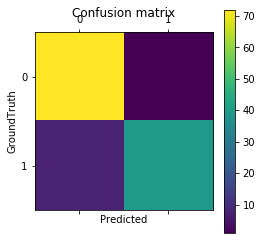

[[72  1]
 [ 8 39]]


In [178]:
conftable(y_test,y_pred,"conf")

In [179]:
# Ground Truth
pd.Series(y_test).value_counts()

0    73
1    47
Name: Purchased, dtype: int64

### Algorithm/ Model 2 : Logistic Regression

In [154]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

ValueError: could not convert string to float: 'Male'

In [181]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Accuracy:  0.6083333333333333
Precision:  0.0
Recall:  0.0
ROC AUC 0.5


C:\Users\training.NG-1NW8PX1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


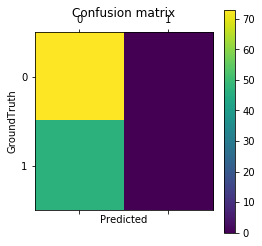

[[73  0]
 [47  0]]


In [182]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

### Algorithm/ Model 3 : Random Forest

In [183]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [184]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Accuracy:  0.9
Precision:  0.8888888888888888
Recall:  0.851063829787234
ROC AUC 0.8912853395511511


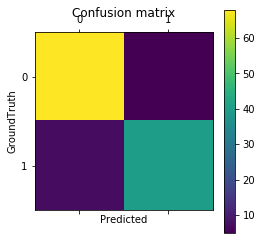

[[68  5]
 [ 7 40]]


In [185]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

### Extra Algorithm/ Model 4 : XGBoost

In [186]:
import xgboost as xgb
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgb = xgboost.fit( x_train, y_train)
y_pred = xgb.predict(x_test)

Accuracy:  0.9333333333333333
Precision:  0.9148936170212766
Recall:  0.9148936170212766
ROC AUC 0.9300495482366656


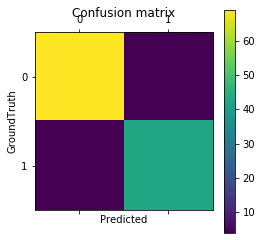

[[69  4]
 [ 4 43]]


In [187]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

# Assignment